**Create GeoDataFrame with spatial (location) data**

In [70]:
import geopandas as gpd
from shapely.geometry import Point

data = {
    'Name': ['Place A', 'Place B'],
    'geometry': [Point(77.6, 12.9), Point(78.5, 13.1)]
}
gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")
print(gdf)


      Name           geometry
0  Place A  POINT (77.6 12.9)
1  Place B  POINT (78.5 13.1)


**Reading Shapefile and working on it**

In [5]:
from google.colab import files

uploaded = files.upload()

Saving datafiles.zip to datafiles.zip


In [7]:
import zipfile
import os

# Extract zip
zip_path = "datafiles.zip"
extract_dir = "shapefile_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [14]:

for file in os.listdir(extract_dir):
    if file.endswith(".shp"):
        shp_file = os.path.join(extract_dir, file)
        break

In [15]:
import geopandas as gpd

# Read a sample shapefile
gdf = gpd.read_file("/content/shapefile_data/datafiles/indlanp010g.shp")

print(gdf.head())


   OBJECTID        AREA   PERIMETER  Indlanp010            FEATURE1  \
0         1  391.087634  133.717749         152  Indian Reservation   
1         2    2.007078    9.271149         153  Indian Reservation   
2         3   66.457411  205.966316         154  Indian Reservation   
3         4   50.968645   37.774333         155  Indian Reservation   
4         5    1.010984    4.022588         156  Indian Reservation   

                         GNIS_Name1 GNIS_ID1 ADMIN1  \
0                      Acoma Pueblo  1934337    BIA   
1                      Acoma Pueblo  1934337    BIA   
2  Agua Caliente Indian Reservation  1934324    BIA   
3          Alamo Navajo Reservation   912566    BIA   
4             Augustine Reservation   238830    BIA   

                     FEATURE2              GNIS_Name2  ... GNIS_ID3 ADMIN3  \
0                         N/A                     N/A  ...      N/A    N/A   
1          Public Domain Land                     N/A  ...      N/A    N/A   
2       

In [69]:
print(type(gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [11]:
#CRS:
print(gdf.crs)

EPSG:4269


In [12]:
#geometry column contains Shapely geometry objects.
print(gdf.geometry.head)

<bound method NDFrame.head of 0      MULTIPOLYGON (((-107.54509 34.9594, -107.54506...
1      POLYGON ((-107.82659 34.86949, -107.81519 34.8...
2      MULTIPOLYGON (((-116.58222 33.69947, -116.5822...
3      POLYGON ((-107.41135 34.40556, -107.41133 34.4...
4      POLYGON ((-116.18173 33.65662, -116.18132 33.6...
                             ...                        
553    POLYGON ((-98.67318 43.37085, -98.40293 43.287...
554    POLYGON ((-98.99887 47.97776, -98.99885 47.970...
555    POLYGON ((-98.95683 48, -98.95687 47.98555, -9...
556    POLYGON ((-84.60886 46.41144, -84.60372 46.411...
557    POLYGON ((-84.59515 46.44876, -84.59358 46.447...
Name: geometry, Length: 558, dtype: geometry>


In [20]:
#Accessing single geometry object

geo_object=gdf.loc[553,'geometry']
print(type(geo_object))
print("Area:", geo_object.area)
print("Centroid:", geo_object.centroid)
print("Bounds:", geo_object.bounds)

<class 'shapely.geometry.polygon.Polygon'>
Area: 0.19469190445280068
Centroid: POINT (-98.37526799100051 43.107888393407165)
Bounds: (-98.6806582239999, 42.83696424900006, -98.0690352879999, 43.371842376000075)


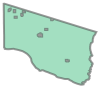

In [22]:
geo_object

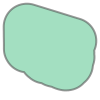

In [28]:
# Buffer open single  geometry object by some units
buffered_area= geo_object.buffer(0.3)
buffered_area

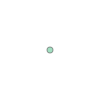

In [30]:
#Finding the  centroid of object
centroid1=geo_object.centroid
centroid1

In [33]:
#Calculate area for polygon geometries
area1=geo_object.area
area1

0.19469190445280068

In [32]:
# Calculate area (works for Polygon geometries)
gdf['area'] = gdf.geometry.area

/tmp/ipython-input-32-3113064333.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf.geometry.area


In [58]:
# shapefile is currently in a geographic CRS like EPSG:4326 (degree) and area should be calculated in meter(epsg=3857)so need to do reproject
gdf=gdf.to_crs(epsg=3857)
gdf['area_m2']=gdf.geometry.area
print(gdf.head())


   OBJECTID        AREA   PERIMETER  Indlanp010            FEATURE1  \
0         1  391.087634  133.717749         152  Indian Reservation   
1         2    2.007078    9.271149         153  Indian Reservation   
2         3   66.457411  205.966316         154  Indian Reservation   
3         4   50.968645   37.774333         155  Indian Reservation   
4         5    1.010984    4.022588         156  Indian Reservation   

                         GNIS_Name1 GNIS_ID1 ADMIN1  \
0                      Acoma Pueblo  1934337    BIA   
1                      Acoma Pueblo  1934337    BIA   
2  Agua Caliente Indian Reservation  1934324    BIA   
3          Alamo Navajo Reservation   912566    BIA   
4             Augustine Reservation   238830    BIA   

                     FEATURE2              GNIS_Name2  ...  \
0                         N/A                     N/A  ...   
1          Public Domain Land                     N/A  ...   
2                         N/A                     N/A  .

In [51]:
print(gdf.columns)

Index(['OBJECTID', 'AREA', 'PERIMETER', 'Indlanp010', 'FEATURE1', 'GNIS_Name1',
       'GNIS_ID1', 'ADMIN1', 'FEATURE2', 'GNIS_Name2', 'GNIS_ID2', 'ADMIN2',
       'FEATURE3', 'GNIS_Name3', 'GNIS_ID3', 'ADMIN3', 'URL', 'STATE',
       'STATE_FIPS', 'ORIG_NAME', 'GIS_ACRES', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'buffered', 'centroid', 'contains_point', 'area'],
      dtype='object')


In [59]:
gdf=gdf.to_crs(epsg=3857)
gdf['centroid']=gdf.geometry.centroid
print(gdf.head())

   OBJECTID        AREA   PERIMETER  Indlanp010            FEATURE1  \
0         1  391.087634  133.717749         152  Indian Reservation   
1         2    2.007078    9.271149         153  Indian Reservation   
2         3   66.457411  205.966316         154  Indian Reservation   
3         4   50.968645   37.774333         155  Indian Reservation   
4         5    1.010984    4.022588         156  Indian Reservation   

                         GNIS_Name1 GNIS_ID1 ADMIN1  \
0                      Acoma Pueblo  1934337    BIA   
1                      Acoma Pueblo  1934337    BIA   
2  Agua Caliente Indian Reservation  1934324    BIA   
3          Alamo Navajo Reservation   912566    BIA   
4             Augustine Reservation   238830    BIA   

                     FEATURE2              GNIS_Name2  ...  \
0                         N/A                     N/A  ...   
1          Public Domain Land                     N/A  ...   
2                         N/A                     N/A  .

In [35]:
#For each row (geometry) in gdf, it checks if the target_point is inside that shape return true or false.
from shapely.geometry import Point
target_point = Point(1.5, 2.0)

gdf['contains_point'] = gdf.geometry.contains(target_point)

print(gdf['contains_point'])

0      False
1      False
2      False
3      False
4      False
       ...  
553    False
554    False
555    False
556    False
557    False
Name: contains_point, Length: 558, dtype: bool


In [36]:
target_point = Point(-107.5, 35.0)
gdf['contains_point'] = gdf.geometry.contains(target_point)
matched = gdf[gdf['contains_point']]
print(matched)


    OBJECTID        AREA   PERIMETER  Indlanp010            FEATURE1  \
37        38  803.632666  439.279297         189  Indian Reservation   

       GNIS_Name1 GNIS_ID1 ADMIN1 FEATURE2 GNIS_Name2  ... STATE_FIPS  \
37  Laguna Pueblo   923617    BIA      N/A        N/A  ...         35   

        ORIG_NAME      GIS_ACRES SHAPE_Leng SHAPE_Area  \
37  LAGUNA PUEBLO  514324.906486   7.066411    0.20558   

                                             geometry  \
37  MULTIPOLYGON (((-107.43108 34.6821, -107.4311 ...   

                                             buffered  \
37  POLYGON ((-98.76112374304537 43.02634777801696...   

                      centroid     area contains_point  
37  POINT (-107.2582 35.02433)  0.20558           True  

[1 rows x 28 columns]


In [64]:
gdf=gdf.drop(columns=['centroid'])

In [ ]:
#Saving Modified Shapefile and  saving shapefile to geojson
gdf.to_file("modified_shapefile.shp")
gdf.to_file("modified_shapefile.geojson", driver="GeoJSON")
